,State,Total population,Hispanic (of any race),Non-Hispanic White,Non-Hispanic Black,Non-Hispanic Asian,Non-Hispanic American Indian,Hispanic (of any race) percentage,Non-Hispanic White percentage,Non-Hispanic Black percentage,Non-Hispanic Asian percentage,Non-Hispanic American Indian percentage
4,California,39536653,15477306,14616636,2164239,5679986,147880,0.391467,0.369698,0.054740,0.143664,0.003740
10,Georgia,10429379,1001472,5487048,3245371,408067,18335,0.096024,0.526115,0.311176,0.039127,0.001758
20,Maryland,6052177,612709,3066146,1776692,389297,11879,0.101238,0.506619,0.293562,0.064323,0.001963
21,Massachusetts,6859819,811292,4906564,477846,450311,9439,0.118267,0.715261,0.069659,0.065645,0.001376


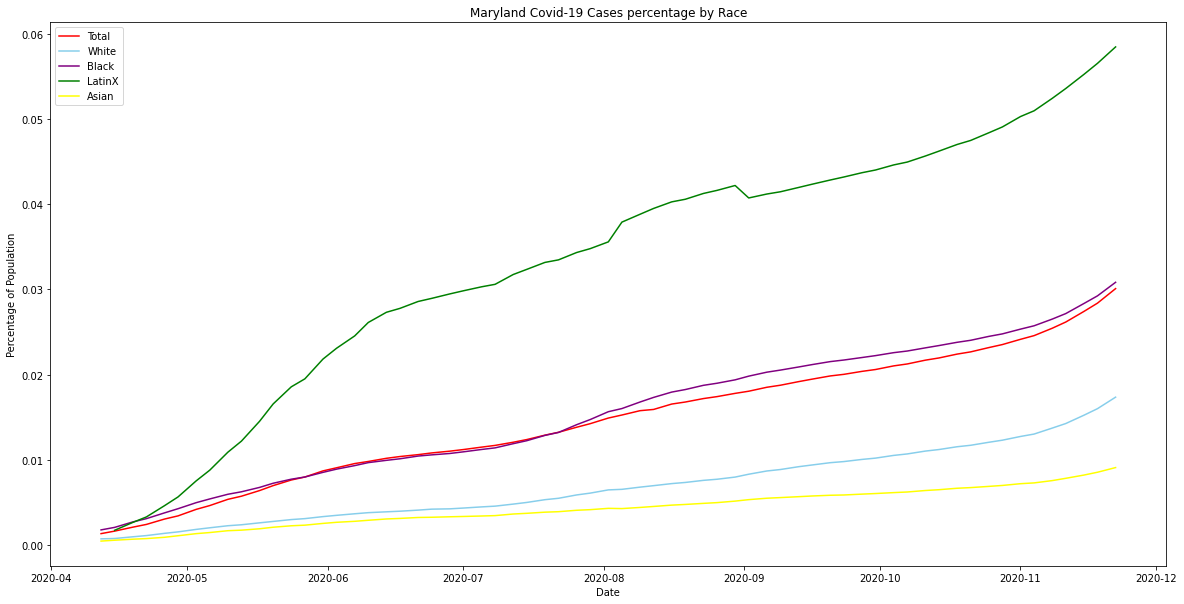

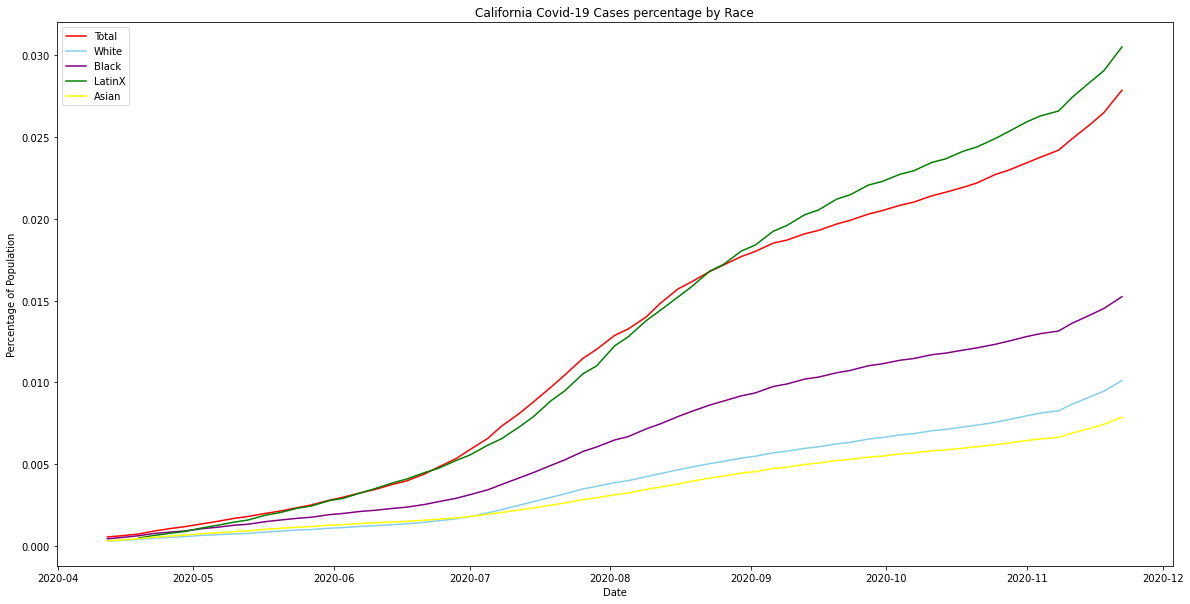

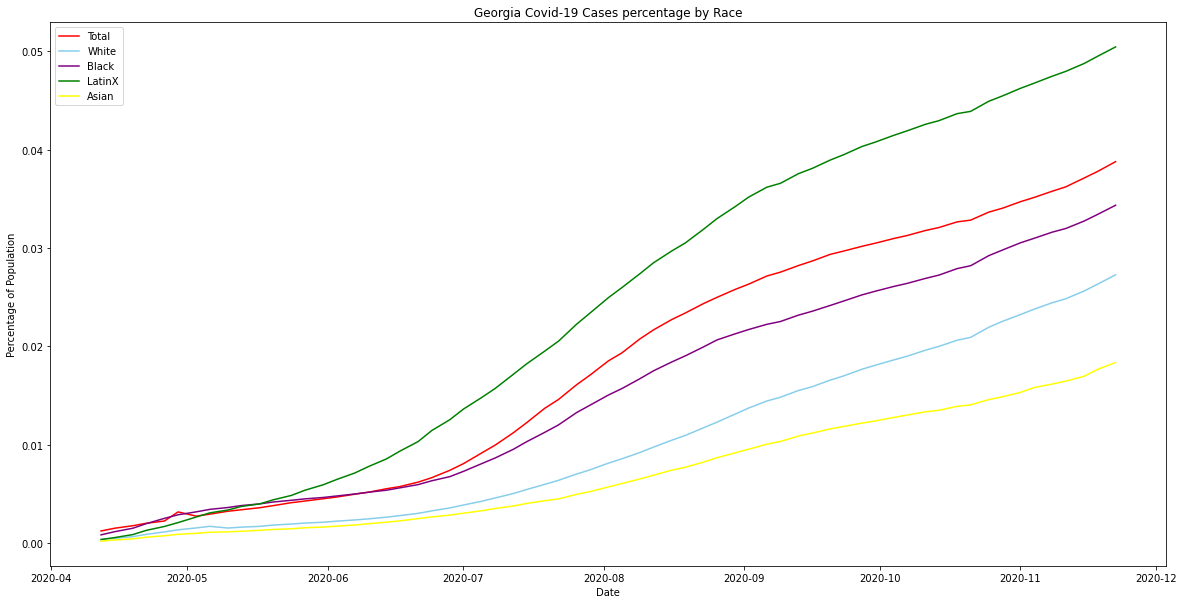

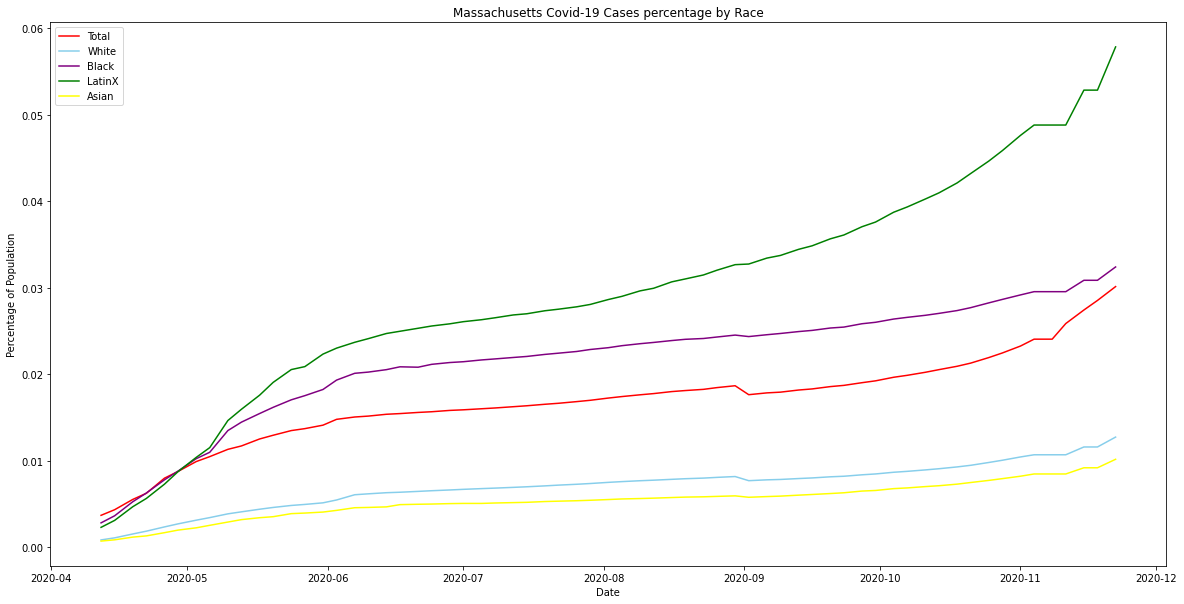

In [59]:
import csv, pandas as pd, matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

# function for plotting covid 19 percentage of covid population in different races by state
def racialPlot(populations_by_races, covid_cases_by_races_by_states, state, stateCode):
    
    # select only the input state matches the State column from the populations_by_races dataframe
    populations = populations_by_races.query(f"State == '{state}'")
    
    # select only the input state code matches the State column from the covid_cases_by_races_by_states dataframe
    races = covid_cases_by_races_by_states.query(f"State == '{stateCode}'")
    
    # calculate the percentage of covid population for each race including White, Black, Hispanic and Asian
    races["Cases_Total_Percentage"] = pd.to_numeric(races["Cases_Total"], downcast='float').div(populations["Total population"].values[0])
    races["Cases_White_Percentage"] = pd.to_numeric(races["Cases_White"], downcast='float').div(populations["Non-Hispanic White"].values[0])
    races["Cases_Black_Percentage"] = races["Cases_Black"].div(populations["Non-Hispanic Black"].values[0])
    races["Cases_Hispanic_Percentage"] = races["Cases_Ethnicity_Hispanic"].div(populations["Hispanic (of any race)"].values[0])
    races["Cases_Asian_Percentage"] = races["Cases_Asian"].div(populations["Non-Hispanic Asian"].values[0])
    
    # convert the Date column to datetime type
    races["Date"] = pd.to_datetime(races["Date"], format='%Y%m%d')

    # plot the Date vs Case Percentage for each race
    plt.figure(figsize=(20,10)) 
    plt.plot(races["Date"], races["Cases_Total_Percentage"], color='red', label='Total')
    plt.plot(races["Date"], races["Cases_White_Percentage"], color='skyblue', label='White')
    plt.plot(races["Date"], races["Cases_Black_Percentage"], color='purple', label='Black')
    plt.plot(races["Date"], races["Cases_Hispanic_Percentage"], color='green', label='LatinX')
    plt.plot(races["Date"], races["Cases_Asian_Percentage"], color='yellow', label='Asian')
    
    # set the tile and labels for the plot
    plt.title(f'{state} Covid-19 Cases percentage by Race')
    plt.ylabel('Percentage of Population')
    plt.xlabel('Date')
    plt.legend()

# dictionary for storing state names and state codes for plotting
states = {"Maryland": "MD", "California": "CA", "Georgia": "GA", "Massachusetts": "MA"}

# read the populations_by_races data from csv file
populations_by_races = pd.read_csv("US_Population_By_State.csv", thousands=',')

# read the covid_cases_by_races_by_states from csv file
covid_cases_by_races_by_states = pd.read_csv("COVID-19_Race_By_States.csv")

# iterate the dictionary key and plot their graph by state name and state code
for state in states:
    racialPlot(populations_by_races, covid_cases_by_races_by_states, state, states[state])

# get the list of state names from the states dictionary
statesNames = list(states.keys())

# for each column after index 2 in populations_by_races, calculate the population percentage by dividing the population of the race by the total population
for i in range(2, len(populations_by_races.columns)):
    race = populations_by_races.columns[i]
    populations_by_races[f"{race} percentage"] = populations_by_races[race].div(populations_by_races["Total population"])

# show the table of race population and race population percentage by state     
populations_by_races.query("State == @statesNames")

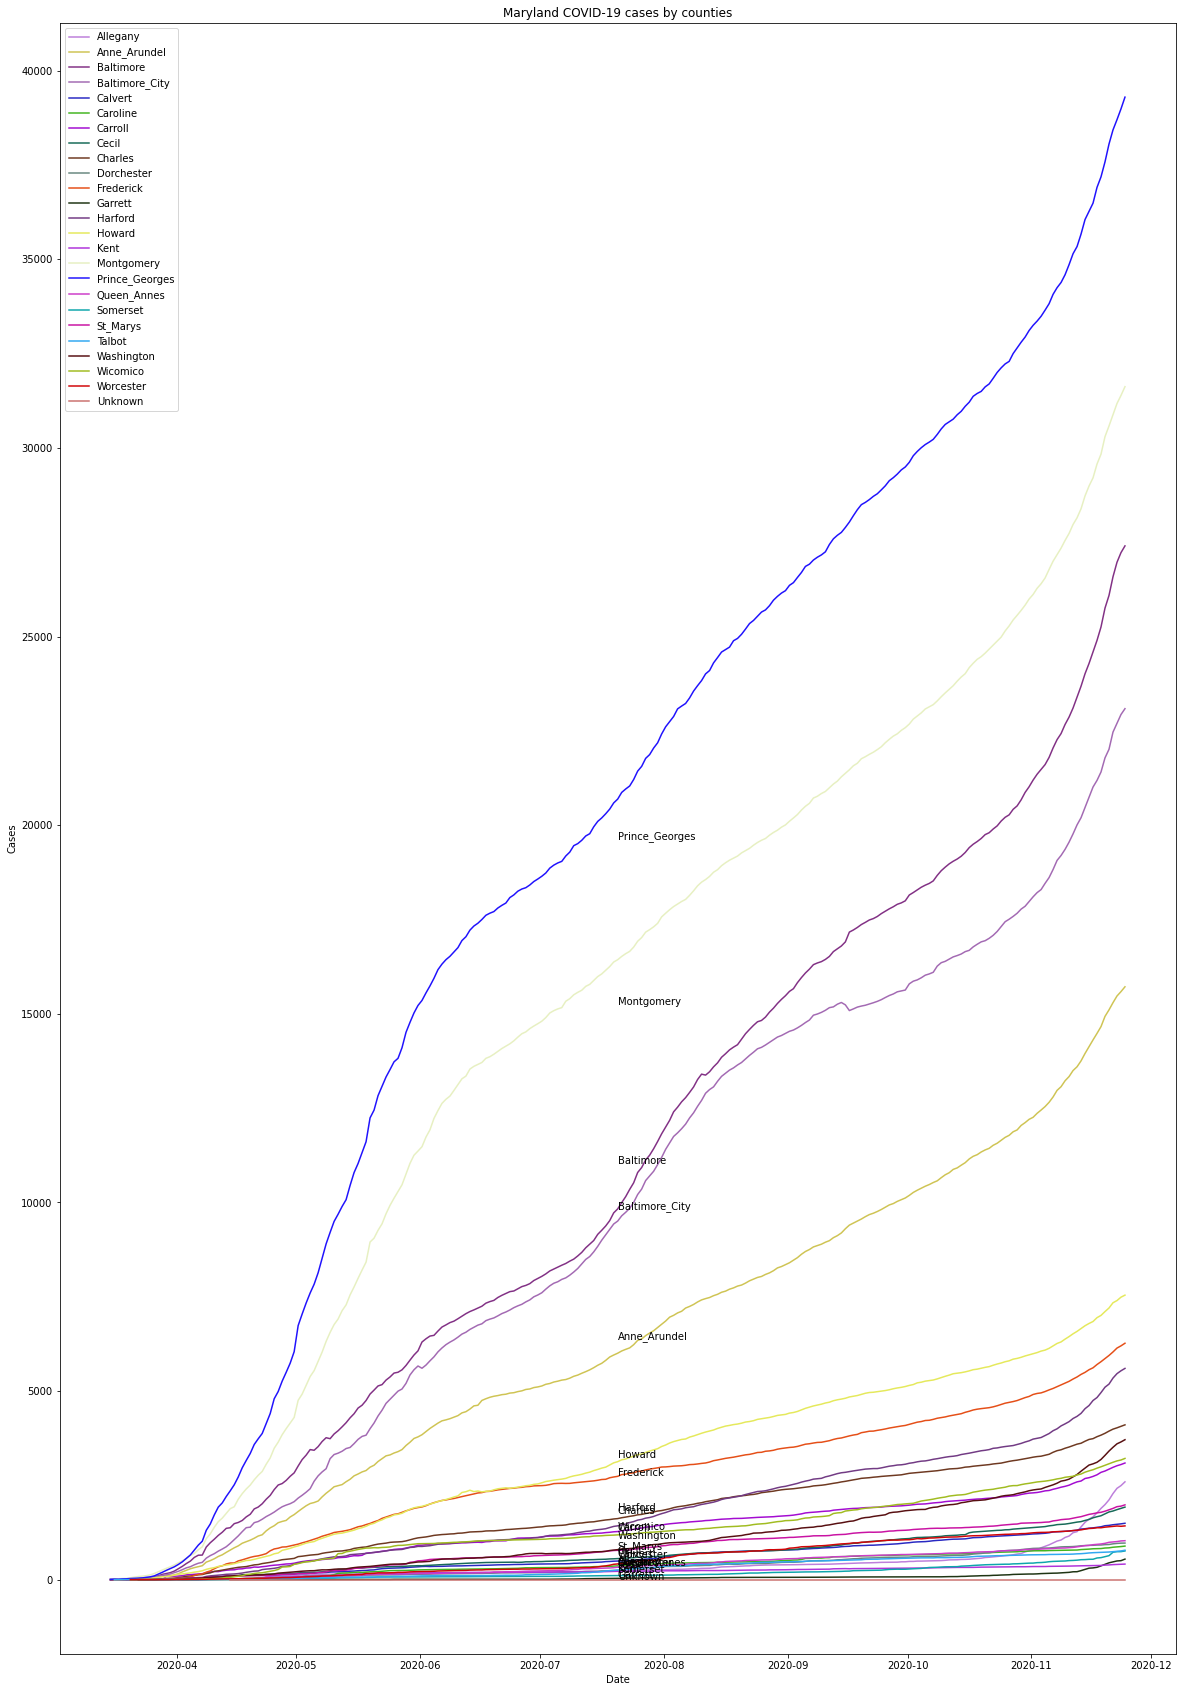

In [60]:
import csv, pandas as pd, matplotlib.pyplot as plt
import random

# function for plotting the cases by counties in a state
def countiesCases(stateCases, stateName):
    
    # convert the DATE column from string to datetime
    stateCases["DATE"] = pd.to_datetime(stateCases["DATE"])

    # set size, tile and labels for plot
    plt.figure(figsize=(20,30))
    plt.title(f"{stateName} COVID-19 cases by counties")
    plt.ylabel('Cases')
    plt.xlabel('Date')
    
    # for each column after index 2 in the dataframe which represent each county
    # plot the date vs cases data to the plot and annotate the county name to the plot
    for i in range(2, len(stateCases.columns)):
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)
        county = stateCases.columns[i]
        plt.plot(stateCases["DATE"], stateCases[county], color=color, label=county)
        plt.annotate(stateCases.columns[i], xy=(stateCases["DATE"].mean(),stateCases[county].mean()), xycoords='data')
    plt.legend()

# read the Maryland Covid cases by county data from the csv file
mdCases = pd.read_csv("MD_COVID_By_County.csv")

# plot the Maryland Covid cases by counties graph
countiesCases(mdCases, "Maryland")

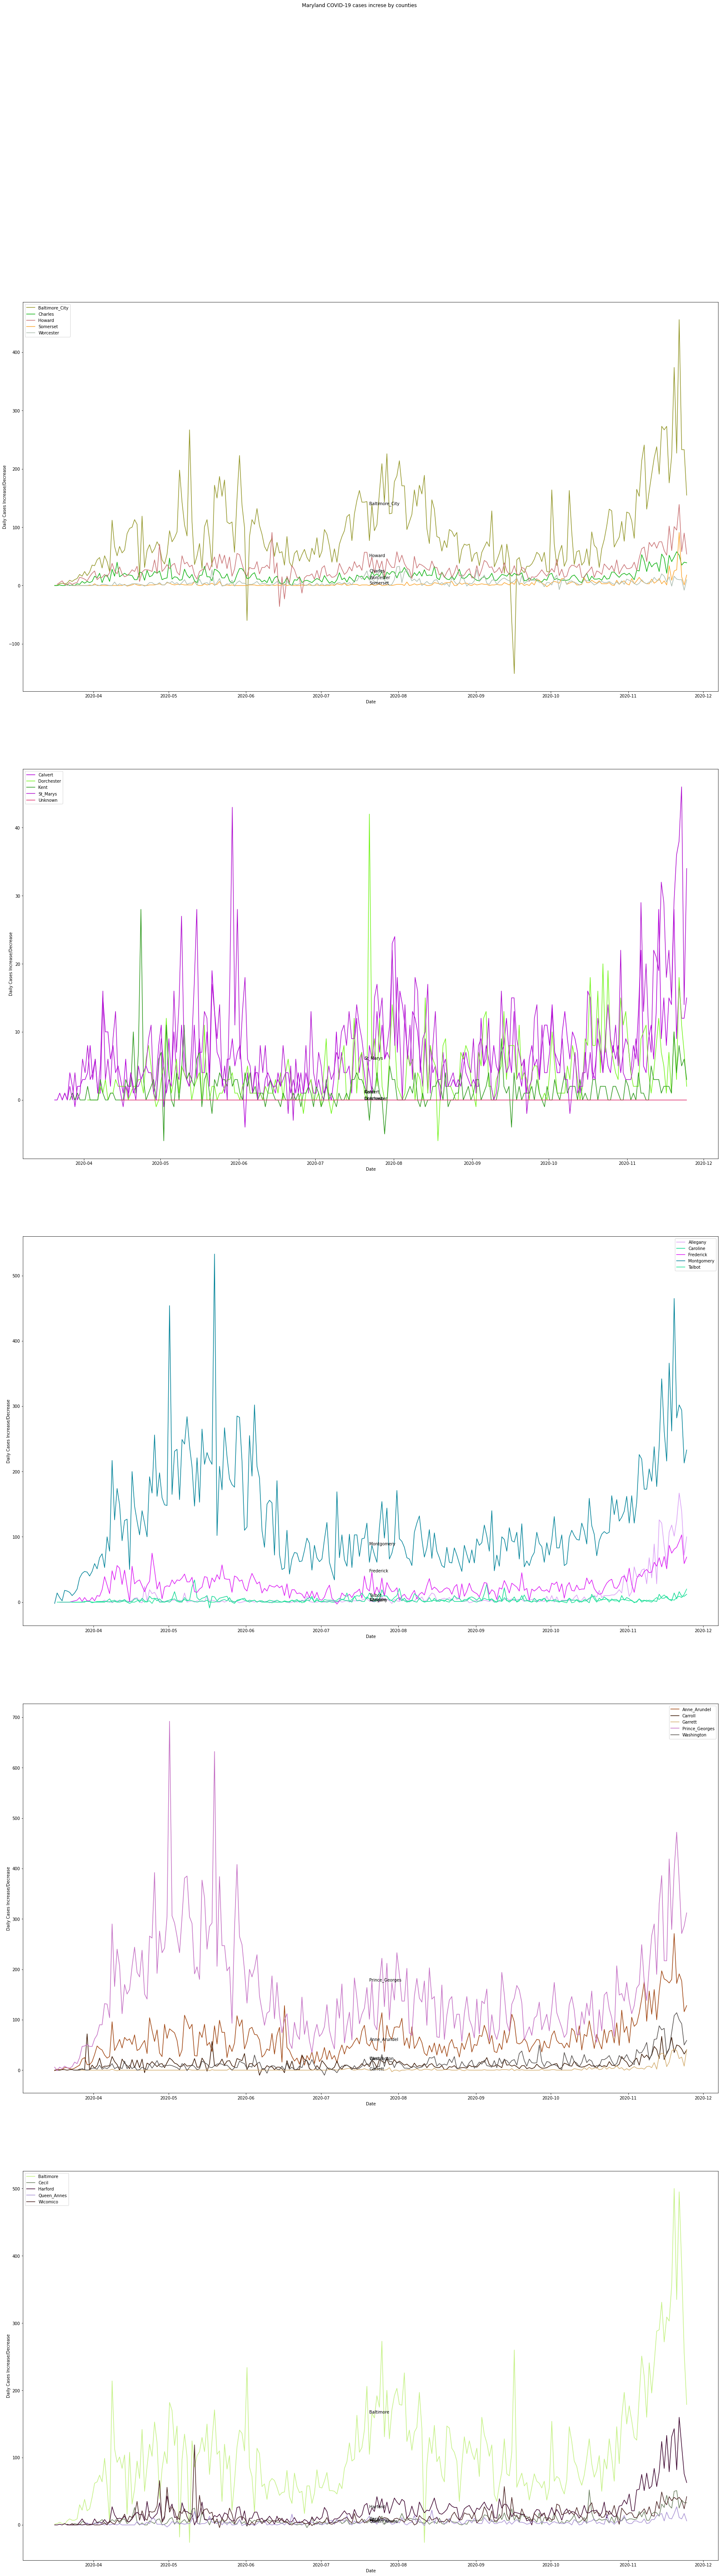

In [56]:
import random

# function to plot the increase cases by each county in a state
def countiesIncreaes(stateCases, stateName):
    
    # convert the DATE column from string to datetime
    stateCases["DATE"] = pd.to_datetime(stateCases["DATE"])
    
    # get the diff dataframe of the stateCases dataframe to get the increases/decreases per day per county
    diff = stateCases.diff()
    
    # set the DATE column of the diff dataframe to the DATE column of the stateCases dataframe
    diff["DATE"] = stateCases["DATE"]

    # set 5 subplots for the graph as there are too many counties to show in one single plot
    fig, axs = plt.subplots(5, figsize=(30,100))
    
    # set title
    fig.suptitle(f'{stateName} COVID-19 cases increse by counties')

    # for each column after index 2 in the diff dataframe which represent each county's increase/decrease per day
    # plot the date vs cases increase/decrease data to the plot and annotate the county name to the plot
    for i in range(2, len(diff.columns)):
        # get a random rgb for the plot color
        r = random.random()
        b = random.random()
        g = random.random()
        color = (r, g, b)
        
        # plot the date and daily increase/decrease
        axs[i % 5].plot(diff["DATE"], diff[diff.columns[i]], color=color, label=diff.columns[i])
        axs[i % 5].annotate(diff.columns[i], xy=(diff["DATE"].mean(),diff[diff.columns[i]].values[round(len(diff.index) / 2)]), xycoords='data')
    
    for j in range(0, 5):
        axs[j].legend()
        axs[j].set_ylabel('Daily Cases Increase/Decrease')
        axs[j].set_xlabel('Date')

mdCases = pd.read_csv("MD_COVID_By_County.csv")
countiesIncreaes(mdCases, "Maryland")